## ML Final Project

**Scenario:** You work at a multinational bank that is aiming to increase it's market share in 
Europe. Recently, it has been noticed that the number of customers using the banking 
services has declined, and the bank is worried that existing customers have stopped 
using them as their main bank. <br> 

As a data scientist, you are tasked with finding out the 
reasons behind customer churn (when a customer stops using them as the main bank) and to predict customer churn. <br> 

The marketing team, 
in particular, is interested in your findings and want to better understand existing 
customer behavior and possibly predict customer churn. Your results will help the 
marketing team to use their budget wisely to target potential churners. To achieve 
this objective, in this exercise, you will import the banking data (Churn_Modelling.csv) 
provided by the bank and do some machine learning to solve their problem.

Data dictionary

- CustomerID: Unique ID of each customer
- CredRate: Credit Score of the customer 
- Geography: Country customer is from 
- Gender
- Age
- Tenure: How long customer has been with bank 
- balance: The amount of money customer has/had with bank
- Prod Number: Number of products customer has with bank 
- HasCrCard: Does customer have credit card
- ActMem: Is customer active member / whether customer was actively engaged with bank activities.
- Estimated salary: Annual estimated salary of customer 
- Exited: Whether customer has churned (1 is yes)

# 1) Introduction

The aim for this study outcome is to explore and identify what could be the potential factors that influence/impact behind customer churn. Then build a prediction model to help predict and classify the potential customer that may be churn. Based on the performance, analysis and provide insights to the business on what kind of actions can be taken to minimize the chances of customer churn in order to help increase it's market share in Europe going forward.

# 2) Data understanding/ Preprocessing

In [1]:
#import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error, roc_auc_score, roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

## Understanding Data

In [3]:
data.head()

CustomerId  CredRate Geography  Gender   Age  Tenure    Balance  \
0    15634602       619    France  Female  42.0       2       0.00   
1    15647311       608     Spain  Female  41.0       1   83807.86   
2    15619304       502    France  Female  42.0       8  159660.80   
3    15701354       699    France  Female  39.0       1       0.00   
4    15737888       850     Spain  Female  43.0       2  125510.82   

   Prod Number  HasCrCard  ActMem  EstimatedSalary  Exited  
0            1          1       1        101348.88       1  
1            1          0       1        112542.58       0  
2            3          1       0        113931.57       1  
3            2          0       0         93826.63       0  
4            1          1       1         79084.10       0

In [4]:
data.isna().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [6]:
data.shape

(10000, 12)

In [7]:
data[data.isna().any(axis=1)]

CustomerId  CredRate Geography  Gender   Age  Tenure    Balance  \
6       15592531       822    France     NaN  50.0       7       0.00   
10      15767821       528    France    Male   NaN       6  102016.72   
11      15737173       497     Spain    Male   NaN       3       0.00   
12      15632264       476    France  Female   NaN      10       0.00   
37      15729599       804     Spain    Male   NaN       7   76548.60   
38      15717426       850    France    Male   NaN       7       0.00   
39      15585768       582   Germany    Male   NaN       6   70349.48   
74      15770811       519    France    Male  36.0       9       0.00   
77      15662085       678    France  Female  32.0       9       0.00   
87      15625759       729    France    Male  30.0       9       0.00   
92      15809248       524    France  Female  36.0      10       0.00   
7809    15780989       579     Spain     NaN  43.0       2  145843.82   
7818    15637977       542   Germany     NaN  25.0       8  139330.10   
9282    15799435       619     Spain     NaN  34.0       1       0.00   

      Prod Number  HasCrCard  ActMem  EstimatedSalary  Exited  
6               2          1       1         10062.80       0  
10              2          0       0         80181.12       0  
11              2          1       0         76390.01       0  
12              2          1       0         26260.98       0  
37              1          0       1         98453.45       0  
38              1          1       1         40812.90       0  
39              2          0       1        178074.04       0  
74              2          0       1              NaN       0  
77              1          1       1              NaN       0  
87              2          1       0              NaN       0  
92              2          1       0              NaN       0  
7809            1          1       1        198402.37       1  
7818            1          0       0         54372.37       0  
9282            1          1       0        139919.38       0

In [8]:
data.describe()

CustomerId      CredRate          Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  9994.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800    38.925255      5.012800   76485.889288   
std    7.193619e+04     96.653299    10.489248      2.892174   62397.405202   
min    1.556570e+07    350.000000    18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000    32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000    37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000    44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000    92.000000     10.000000  250898.090000   

        Prod Number    HasCrCard        ActMem  EstimatedSalary        Exited  
count  10000.000000  10000.00000  10000.000000      9996.000000  10000.000000  
mean       1.530200      0.70550      0.515100    100074.744083      0.203700  
std        0.581654      0.45584      0.499797     57515.774555      0.402769  
min        1.000000      0.00000      0.000000        11.580000      0.000000  
25%        1.000000      0.00000      0.000000     50974.077500      0.000000  
50%        1.000000      1.00000      1.000000    100168.240000      0.000000  
75%        2.000000      1.00000      1.000000    149388.247500      0.000000  
max        4.000000      1.00000      1.000000    199992.480000      1.000000

In [9]:
data.corr()

CustomerId  CredRate       Age    Tenure   Balance  \
CustomerId         1.000000  0.005308  0.009704 -0.014883 -0.012419   
CredRate           0.005308  1.000000 -0.004214  0.000842  0.006268   
Age                0.009704 -0.004214  1.000000 -0.009942  0.028086   
Tenure            -0.014883  0.000842 -0.009942  1.000000 -0.012254   
Balance           -0.012419  0.006268  0.028086 -0.012254  1.000000   
Prod Number        0.016972  0.012238 -0.030571  0.013444 -0.304180   
HasCrCard         -0.014025 -0.005458 -0.011761  0.022583 -0.014858   
ActMem             0.001665  0.025651  0.085301 -0.028362 -0.010084   
EstimatedSalary    0.015276 -0.001352 -0.007249  0.007411  0.013133   
Exited            -0.006248 -0.027094  0.285225 -0.014001  0.118533   

                 Prod Number  HasCrCard    ActMem  EstimatedSalary    Exited  
CustomerId          0.016972  -0.014025  0.001665         0.015276 -0.006248  
CredRate            0.012238  -0.005458  0.025651        -0.001352 -0.027094  
Age                -0.030571  -0.011761  0.085301        -0.007249  0.285225  
Tenure              0.013444   0.022583 -0.028362         0.007411 -0.014001  
Balance            -0.304180  -0.014858 -0.010084         0.013133  0.118533  
Prod Number         1.000000   0.003183  0.009612         0.014134 -0.047820  
HasCrCard           0.003183   1.000000 -0.011866        -0.009937 -0.007138  
ActMem              0.009612  -0.011866  1.000000        -0.011473 -0.156128  
EstimatedSalary     0.014134  -0.009937 -0.011473         1.000000  0.012235  
Exited             -0.047820  -0.007138 -0.156128         0.012235  1.000000

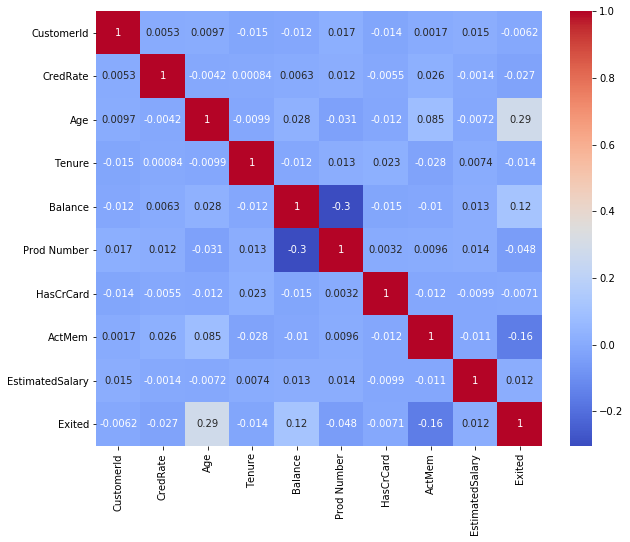

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(),cmap='coolwarm', annot=True, ax=ax)

From the above heatmap, we could get a sense the correlation of the data features. Surprisingly these features their correlation aren't that high. Only "Age" seems has a higher number of correlation of "Exited" feature.<br>
<br>

In [11]:
#Checking how many countries inclusive
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
#Checking the numberic of Tenure
data.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [13]:
#Checking the numberic of Prod Number
data["Prod Number"].unique()

array([1, 3, 2, 4])

In [14]:
#Checking the indication for Has and do not has Credit Card, just 1 & 0
data.HasCrCard.unique()

array([1, 0])

In [15]:
#Don't see how CustomerId is helpful on the ML model, decided to drop it
data = data.drop(["CustomerId"], axis = 1)
data.head()

CredRate Geography  Gender   Age  Tenure    Balance  Prod Number  \
0       619    France  Female  42.0       2       0.00            1   
1       608     Spain  Female  41.0       1   83807.86            1   
2       502    France  Female  42.0       8  159660.80            3   
3       699    France  Female  39.0       1       0.00            2   
4       850     Spain  Female  43.0       2  125510.82            1   

   HasCrCard  ActMem  EstimatedSalary  Exited  
0          1       1        101348.88       1  
1          0       1        112542.58       0  
2          1       0        113931.57       1  
3          0       0         93826.63       0  
4          1       1         79084.10       0

## Handling Missing Value and check their number of values

Since the number of missung Value is that small amount, decided to drop all the rows with Missing Value.

In [16]:
data = data.dropna()

In [17]:
data.Gender.isna().sum()

0

In [18]:
data['Gender'].value_counts()

Male      5446
Female    4540
Name: Gender, dtype: int64

In [19]:
data['Geography'].value_counts()

France     5006
Germany    2507
Spain      2473
Name: Geography, dtype: int64

In [20]:
data['Exited'].value_counts()

0    7950
1    2036
Name: Exited, dtype: int64

In [21]:
data['HasCrCard'].value_counts()

1    7046
0    2940
Name: HasCrCard, dtype: int64

In [22]:
data['Prod Number'].value_counts()

1    5078
2    4582
3     266
4      60
Name: Prod Number, dtype: int64

In [23]:
data['ActMem'].value_counts()

1    5144
0    4842
Name: ActMem, dtype: int64

In [24]:
#Inspect again if any na value

data.isna().sum()

CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
data.shape

(9986, 11)

## Exploratory Data Analysis

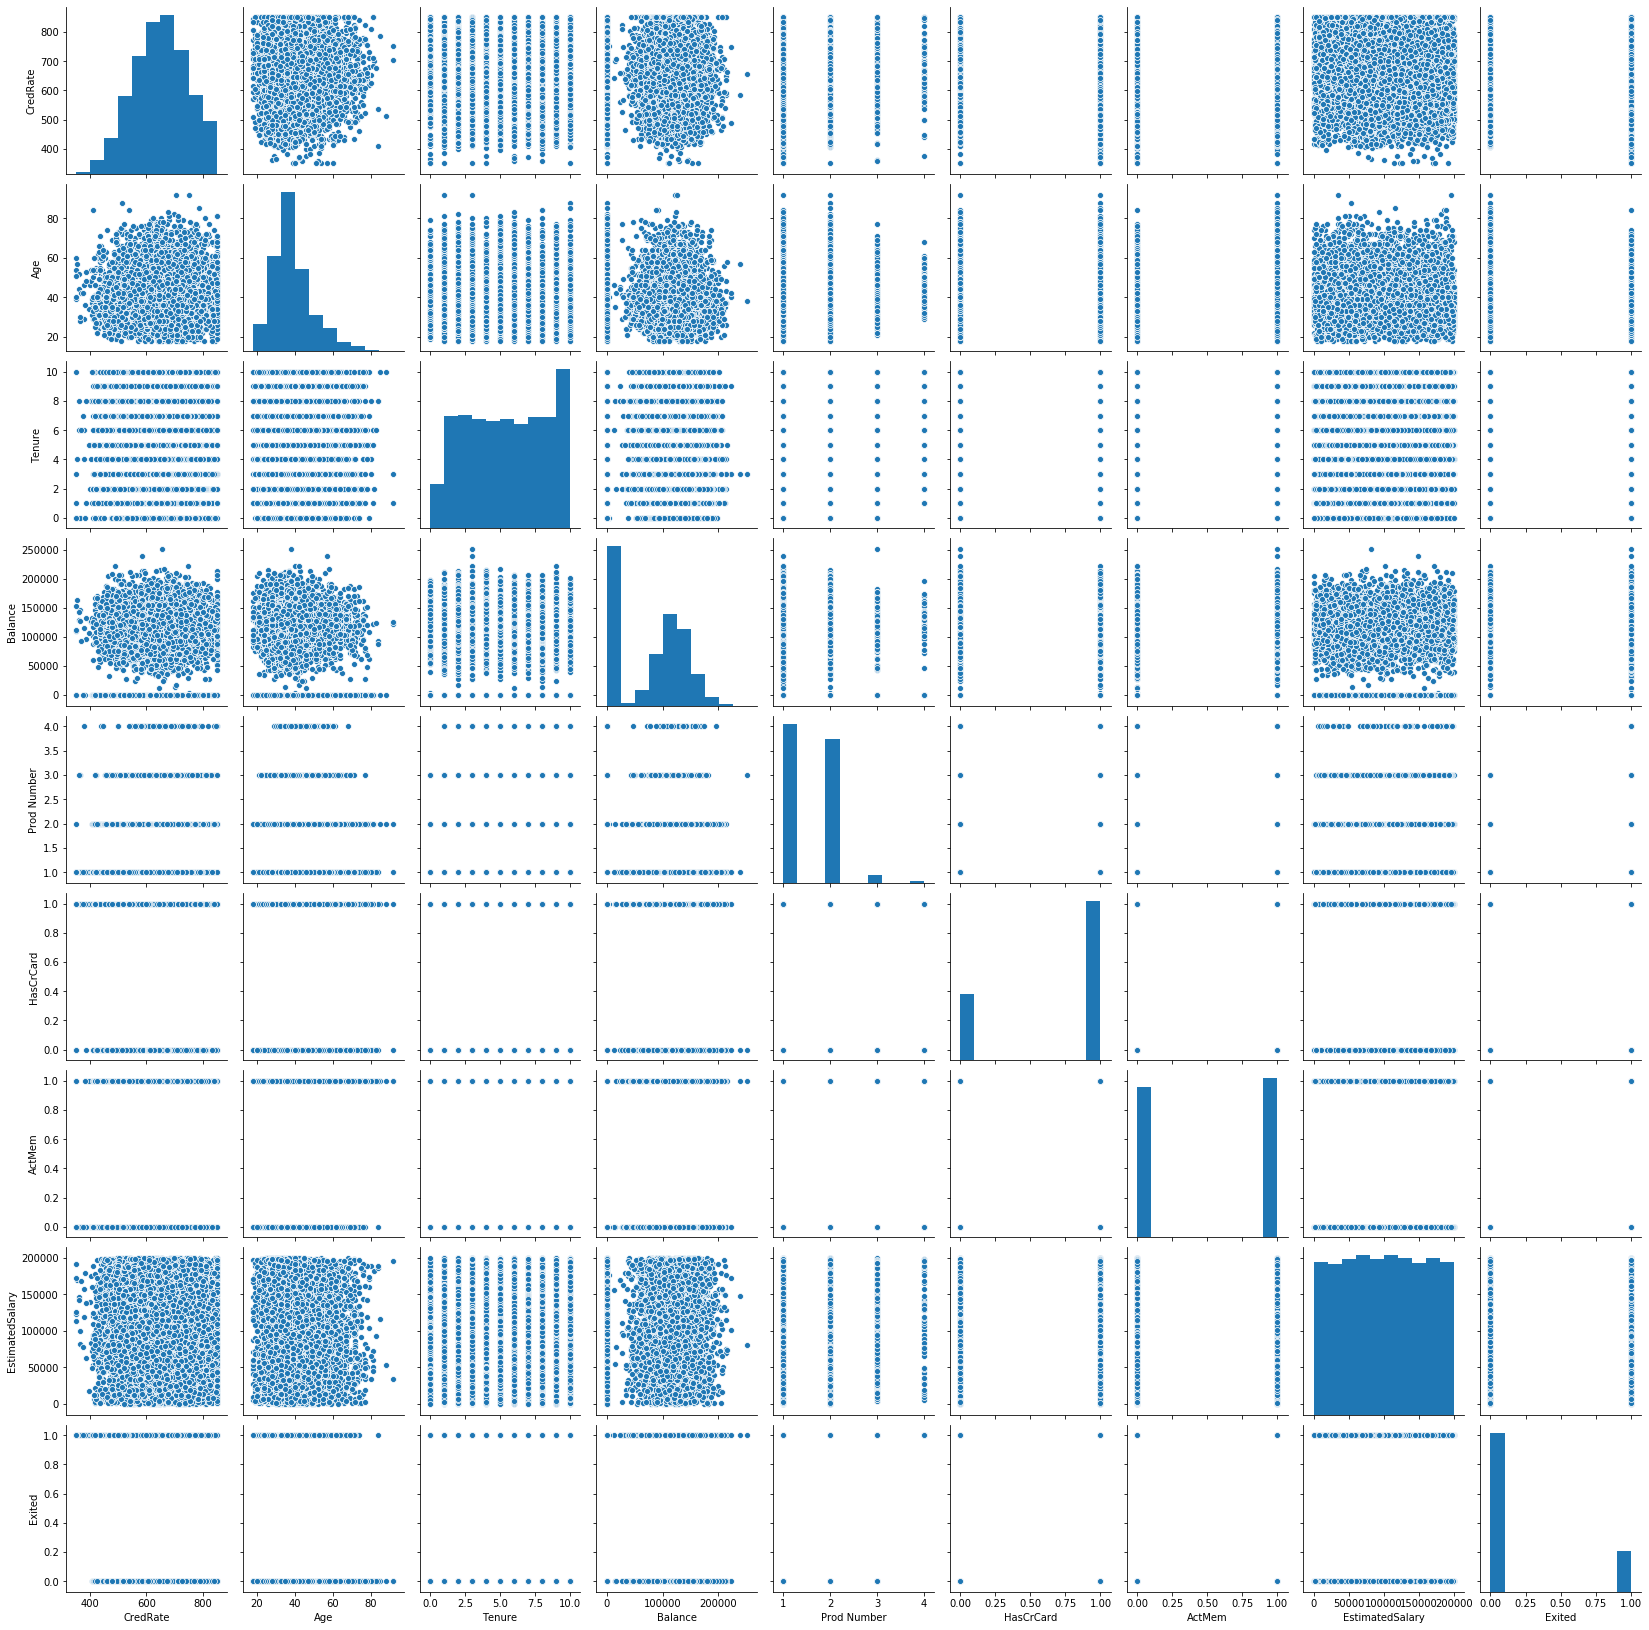

In [26]:
sns.pairplot(data)

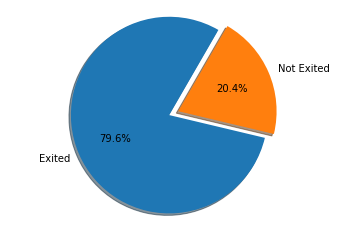

In [27]:
labels = 'Exited', 'Not Exited'
sizes = data['Exited'].value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode = explode,autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [28]:
import plotly.graph_objs as go

value = data['Exited'].value_counts()

fig = go.Figure(data=[go.Pie(labels=['Exited','Not Exited'],
                            values=data['Exited'].value_counts(),
                            textinfo = 'value + percent + label')])
fig.show()

From the Pie Charts above, it gave us a quick overview of the ratio of customer churn and indeed the percentage of "Exited" group is high and almost close to 80% of the total number.

In [29]:
# to get offline plotly/HTML
import plotly.offline as offline
offline.init_notebook_mode(connected=True)
 
offline.plot(fig)

'temp-plot.html'

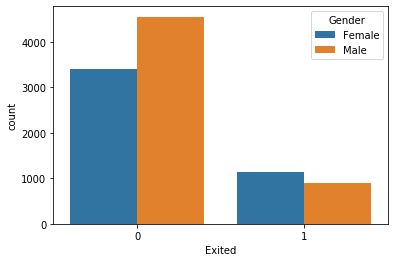

In [30]:
sns.countplot(x = 'Exited', hue = 'Gender', data = data)

Tried to explore what kind of plot will able to give me the overview of each of the features relation to the churn. I found countplot is the best to do comparison so I take it to the next step and compare a few more features which created the plots below.

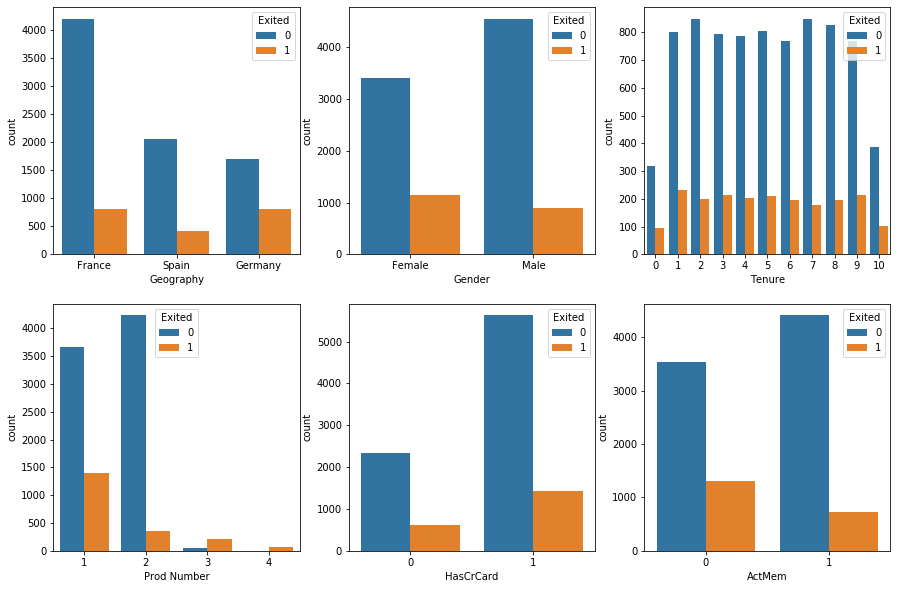

In [31]:
fig, axes = plt.subplots(2,3, figsize = (15,10))

sns.countplot(x='Geography', hue = 'Exited',data = data, ax = axes[0,0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax = axes[0,1])
sns.countplot(x='Tenure', hue = 'Exited',data = data, ax = axes[0,2])
sns.countplot(x='Prod Number', hue = 'Exited',data = data, ax = axes[1,0])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax = axes[1,1])
sns.countplot(x='ActMem', hue = 'Exited',data = data, ax = axes[1,2])

From these 6 Features countplots, here are my hypothesis on their correlation that in relates to the customer churn. <br>

- <b>Geography</b>
    - We can see that the ratio for Germany is smaller ratio of the differences compare to France
- <b>Gender</b>
    - Male has the higher not exited rate and lower exited rate compared to Female
- <b>Tenure</b>
    - The comparison on this feature rather balances, this could suggest that tenure may not be the factors of customer churn. Will find out more along the process.
- <b>Prod Number</b>
    - At a glance, it looks like while the Prod Number 1 & 2 of not exited are way higher, at the same time these numbers may also not be necessary the cause of customer churn.
- <b>HasCrCard</b>
    - Despite "has credit card members" has higher numbers of not exited customer but at the same time the exited customer also pretty high.
- <b>ActMem</b>
    - Surprising the non-Active Member exited is much higher than the Active Member, it may be worth a in depth study by the business.

As Countplot hard to present the correlation of Age and the likelihood of customer churn so decided to use the regplot to study the data.

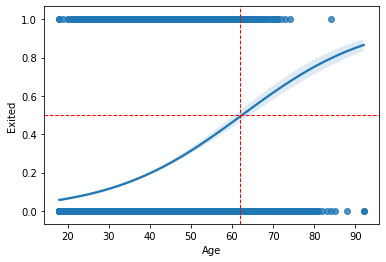

In [32]:
AgePlt = sns.regplot(x="Age", y = "Exited", data = data, logistic=True)

# plotting the horiozontal & Vertical line to give a sense on if at threshold of 0.5, customer with age above 62 are likelihood to churn.
AgePlt.axhline(0.5, ls='--', linewidth=1, color='red')
AgePlt.axvline(62, ls='--', linewidth=1, color='red')


As we can see from the plot, the higher of the age the likelihood to churn/exit from the bank. The prediction models should able to find out if this feature is the biggest factor for customer churn.

### Data preprocessing: Encoding

Breaking down the factors to understand what kinds of data are they:
- CredRate: Credit Score of the customer <b> - Integer</b> 
- Geography: Country customer is from <b>- Category</b>
  - 1 = France
  - 2 = Germany
  - 2 = Spain
- Gender  <b>- Category</b>
  - 1 = male
  - 2 = female
- Age<b> - Integer</b> 
- Tenure: How long customer has been with bank <b> - Integer</b> 
- balance: The amount of money customer has/had with bank<b> - Integer</b> 
- Prod Number: Number of products customer has with bank <b> - Integer/Category</b> 
- HasCrCard: Does customer have credit card <b>- Category</b>
  - 0 = No
  - 1 = Yes
- ActMem: Is customer active member / whether customer was actively engaged with bank activities. <b>- Category</b>
  - 0 = No
  - 1 = Yes
- Estimated salary: Annual estimated salary of customer <b> - Integer</b> 
- Exited: Whether customer has churned (1 is yes) <b>- Category</b>
  - 0 = Not Exited
  - 1 = Exited

In [33]:
data.head()

CredRate Geography  Gender   Age  Tenure    Balance  Prod Number  \
0       619    France  Female  42.0       2       0.00            1   
1       608     Spain  Female  41.0       1   83807.86            1   
2       502    France  Female  42.0       8  159660.80            3   
3       699    France  Female  39.0       1       0.00            2   
4       850     Spain  Female  43.0       2  125510.82            1   

   HasCrCard  ActMem  EstimatedSalary  Exited  
0          1       1        101348.88       1  
1          0       1        112542.58       0  
2          1       0        113931.57       1  
3          0       0         93826.63       0  
4          1       1         79084.10       0

In [34]:
final_data = pd.get_dummies(data, columns=["Geography",
                                           "Gender",
                                           "Prod Number",
                                          "HasCrCard",
                                          "ActMem"])
final_data.head()

CredRate   Age  Tenure    Balance  EstimatedSalary  Exited  \
0       619  42.0       2       0.00        101348.88       1   
1       608  41.0       1   83807.86        112542.58       0   
2       502  42.0       8  159660.80        113931.57       1   
3       699  39.0       1       0.00         93826.63       0   
4       850  43.0       2  125510.82         79084.10       0   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                 1                  0                0              1   
1                 0                  0                1              1   
2                 1                  0                0              1   
3                 1                  0                0              1   
4                 0                  0                1              1   

   Gender_Male  Prod Number_1  Prod Number_2  Prod Number_3  Prod Number_4  \
0            0              1              0              0              0   
1            0              1              0              0              0   
2            0              0              0              1              0   
3            0              0              1              0              0   
4            0              1              0              0              0   

   HasCrCard_0  HasCrCard_1  ActMem_0  ActMem_1  
0            0            1         0         1  
1            1            0         0         1  
2            0            1         1         0  
3            1            0         1         0  
4            0            1         0         1

In [35]:
final_data.rename({"Geography_France": "France", 
                   "Geography_Germany": "Germany",
                   "Geography_Spain": "Spain",
                   "Gender_Female":"Female",
                   "Gender_Male":"Male",
                   "Prod Number_1":"ProdNum01",
                   "Prod Number_2":"ProdNum02",
                   "Prod Number_3":"ProdNum03",
                   "Prod Number_4":"ProdNum04",
                   "HasCrCard_0":"NoCrCard",
                   "HasCrCard_1":"HasCrCard",
                   "ActMem_0": "NotActMem",
                   "ActMem_1": "ActMem",
                  }, axis='columns', inplace=True)

In [36]:
final_data.head()

CredRate   Age  Tenure    Balance  EstimatedSalary  Exited  France  \
0       619  42.0       2       0.00        101348.88       1       1   
1       608  41.0       1   83807.86        112542.58       0       0   
2       502  42.0       8  159660.80        113931.57       1       1   
3       699  39.0       1       0.00         93826.63       0       1   
4       850  43.0       2  125510.82         79084.10       0       0   

   Germany  Spain  Female  Male  ProdNum01  ProdNum02  ProdNum03  ProdNum04  \
0        0      0       1     0          1          0          0          0   
1        0      1       1     0          1          0          0          0   
2        0      0       1     0          0          0          1          0   
3        0      0       1     0          0          1          0          0   
4        0      1       1     0          1          0          0          0   

   NoCrCard  HasCrCard  NotActMem  ActMem  
0         0          1          0       1  
1         1          0          0       1  
2         0          1          1       0  
3         1          0          1       0  
4         0          1          0       1

Based on the kinds of data, decided to encode all the categorical factors but since "HasCrCard","ActMem" and"Exited" columns already in binary number so I leave it as it is. <br>
<br>
"Prod Number" is kind of integar & categorical in my opinion, nevertheless decided to encode it to increase the accuracy.


<br>

## Scaling/Feature Engineering

In [37]:
X = final_data.drop(columns=["Exited"])
y = final_data["Exited"]

In [38]:
X.head()

CredRate   Age  Tenure    Balance  EstimatedSalary  France  Germany  Spain  \
0       619  42.0       2       0.00        101348.88       1        0      0   
1       608  41.0       1   83807.86        112542.58       0        0      1   
2       502  42.0       8  159660.80        113931.57       1        0      0   
3       699  39.0       1       0.00         93826.63       1        0      0   
4       850  43.0       2  125510.82         79084.10       0        0      1   

   Female  Male  ProdNum01  ProdNum02  ProdNum03  ProdNum04  NoCrCard  \
0       1     0          1          0          0          0         0   
1       1     0          1          0          0          0         1   
2       1     0          0          0          1          0         0   
3       1     0          0          1          0          0         1   
4       1     0          1          0          0          0         0   

   HasCrCard  NotActMem  ActMem  
0          1          0       1  
1          0          0       1  
2          1          1       0  
3          0          1       0  
4          1          0       1

In [39]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [40]:
#Splitting Dataset to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 123)

In [41]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [42]:
y.shape

(9986,)

In [43]:
X.shape

(9986, 18)

In [44]:
y_test.head()

1344    1
1388    1
2862    0
1514    0
904     1
Name: Exited, dtype: int64

# 3 & 4) Machine learning model training & Evaluation/Results

## Logistic Regression

Choosing Logistic Regression simply it is commonly use to predict the target of categorical or binary and in which case our dataset and the outcome trying to achieve suggest that this algorithm is one of the simplest to begin with.

In [45]:
classifier = LogisticRegression(random_state=123)

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

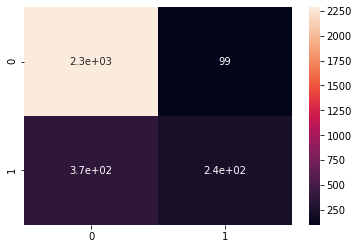

In [47]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2384
           1       0.71      0.39      0.50       612

    accuracy                           0.84      2996
   macro avg       0.78      0.68      0.71      2996
weighted avg       0.83      0.84      0.82      2996



In [49]:
LG_acc = accuracy_score(y_pred, y_test)*100
print("Logistic Regression Accuracy: {}".format(LG_acc))

Logistic Regression Accuracy: 84.27903871829105


In [50]:
LG_auc = roc_auc_score(y_test, y_pred)*100
print("Logistic Regression AUC: {}".format(LG_auc))

Logistic Regression AUC: 67.5315008553757


Out of the Classification Evaluation, the outcome of precision and recall aren't that great for True Negative values. If the prediction is to focus on only True Positive then these evaluation will be good enough. <br>

So I decided to try Accuracy and ROC/AUC. Accuracy focus on true results among the total numbers and it is good for balanced dataset and not skewed. AUC is good to measuring balanced performance of positive and negative classes. As we can see between Accuracy and AUC, Accuracy has the better result compare to AUC for predicting on customer churn. <br>

<br>

## Support Vector Machine 

#### Why not XGBoost but SVM?
At first, I was considering XGBoost but XGBoost is generally use on more large and complicated data prediction. Whereas our customer churn data is not that large and complicated, rather straightforward that consist more of categorical/classifications. <br>
<br>
In the other hand, SVM method objective is to find a hyperplane which maximized the separation between data of different classes. I see this method can be effective as our customer churn data has quite some number of features and fit our objective of to predict if customer will Exited or Not Exited (2 different classes). 


In [51]:
svc_model = SVC(random_state=123)

svc_model.fit(X_train, y_train)
pred_svm = svc_model.predict(X_test)

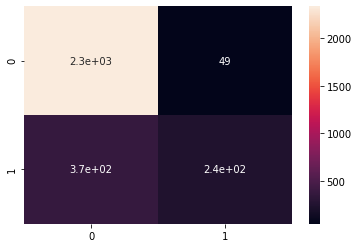

In [52]:
# Confusion Matrix 
cm = confusion_matrix(y_test, pred_svm)

sns.heatmap(cm, annot = True)

In [53]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2384
           1       0.83      0.39      0.53       612

    accuracy                           0.86      2996
   macro avg       0.85      0.69      0.73      2996
weighted avg       0.86      0.86      0.84      2996



In [54]:
SVM_acc = accuracy_score(pred_svm, y_test) * 100
print("SVM accuracy: {}".format(SVM_acc))

SVM accuracy: 85.94793057409879


In [55]:
SVM_auc = roc_auc_score(y_test,pred_svm)*100
print("SVM AUC: {}".format(SVM_auc))

SVM AUC: 68.5801585734965


Support Vector Machines looks pretty similar but better than Logistic Regression at the accuracy score. Let's look at my 3rd choice of the algorithm - Random Forest and it's prediction.

## Random Forest

Random Forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

In [56]:
#Fitting Random Forest Classification
rf_classifier = RandomForestClassifier(random_state=123)

rf_classifier.fit(X_train, y_train)

predict_rf =rf_classifier.predict(X_test)

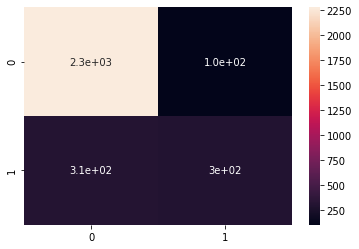

In [57]:
# Confusion Matrix 
cm = confusion_matrix(y_test, predict_rf)

sns.heatmap(cm, annot = True)

In [58]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2384
           1       0.74      0.49      0.59       612

    accuracy                           0.86      2996
   macro avg       0.81      0.72      0.75      2996
weighted avg       0.85      0.86      0.85      2996



In [59]:
#Accuracy score

rf_acc = accuracy_score(predict_rf, y_test)*100
print("Random Forest Accuracy: {}".format(rf_acc))

Random Forest Accuracy: 86.11481975967958


In [60]:
#AUC
rf_auc = roc_auc_score(y_test, predict_rf)*100
print("Random Forest AUC: {}".format(rf_auc))

Random Forest AUC: 72.38932205992018


Out of the 3 algorithms that I used for the prediction models, Random Forest did the best out of them. So I want to spent a bit more focus on see how can I make improvement to the prediction. <br>

Next, I'm going to tune the model for improvement by using Cross Validation(GridSearch CV).
<br>
<br>

### Parameter Tuning

I choose GridSearch CV is because this Cross Validation model will gather all the possible combinations of parameter values are evaluated and the best combination is retained

In [61]:
rf_classifier = RandomForestClassifier(random_state=123)

In [62]:
param_dict_rf = {'n_estimators' : [10, 20, 40, 50, 100], 
                 'max_depth': [5, 6, 7, 8, 9, 10]}

In [63]:
grid_rf = GridSearchCV(param_grid= param_dict_rf, estimator= rf_classifier, cv=5, verbose= 1)

In [64]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   39.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=123,
                                 

In [65]:
grid_rf.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [66]:
best_rf = RandomForestClassifier(max_depth= 10, n_estimators=100, random_state=123)

model_rf = best_rf.fit(X_train, y_train)

result_rf = model_rf.predict(X_test)

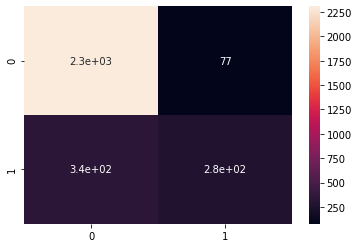

In [67]:
# Confusion Matrix 
cm = confusion_matrix(y_test, result_rf)

sns.heatmap(cm, annot = True)

In [68]:
print(classification_report(y_test, result_rf))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2384
           1       0.78      0.45      0.57       612

    accuracy                           0.86      2996
   macro avg       0.83      0.71      0.75      2996
weighted avg       0.85      0.86      0.85      2996



In [69]:
rf_acc = accuracy_score(result_rf, y_test)*100
print("Random Forest Accuracy: {}".format(rf_acc))

Random Forest Accuracy: 86.2483311081442


In [70]:
rf_auc = roc_auc_score(y_test, result_rf)*100
print("Random Forest AUC: {}".format(rf_auc))

Random Forest AUC: 71.01578606834232


Although the improvement is not much but as we can see, the model prediction definitely improved compare to the one without the tuning.

Random Forest algorithm can help us to predict the chances of customer churn up to 86.5%. Overall it is pretty good model for the business to begin their study and prediction of customer churn.

### Feature Importance

In [71]:
len(model_rf.feature_importances_)

18

In [72]:
model_rf.feature_importances_

array([0.07360533, 0.29335499, 0.04537286, 0.10661022, 0.0730154 ,
       0.01228071, 0.03867742, 0.00915296, 0.0111908 , 0.01113652,
       0.04523633, 0.1073154 , 0.07010104, 0.02038858, 0.0076694 ,
       0.00746039, 0.03251852, 0.03491311])

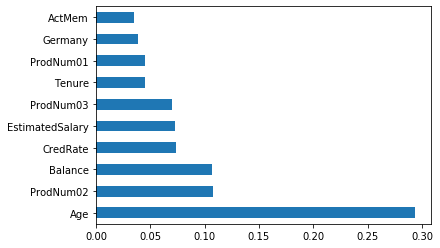

In [73]:
feat_importances = pd.Series(model_rf.feature_importances_, index= X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [74]:
feature_importances = pd.DataFrame(model_rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
Age                0.293355
ProdNum02          0.107315
Balance            0.106610
CredRate           0.073605
EstimatedSalary    0.073015
ProdNum03          0.070101
Tenure             0.045373
ProdNum01          0.045236
Germany            0.038677
ActMem             0.034913
NotActMem          0.032519
ProdNum04          0.020389
France             0.012281
Female             0.011191
Male               0.011137
Spain              0.009153
NoCrCard           0.007669
HasCrCard          0.007460

From the Plot or Data Frame, it helps us to understand what are the main factors of customer churn based on the dataset features.
<br>
<br>
We can see and suggest that Age, Customers have 2 Products with the bank and Balance in the Bank are the top 3 most crucial factors of customer churn where their importance rates are pretty high compared to other features.

# Conclusion

- Random Forest Model is good prediction model for tackle this problem matter. But it can be improve better with some boosting methods. 
- If given more times, first thing will want to try on will be different ensemble methods and boosting algorithms to refine and improve the models. Also other different ML algorithms as those I chosen here consider the basic algorithms
- 2 of my favourite Biggest takeaways from this work
    - First ever ML model from scratch.
    - Research and reference in Kaggle how others build their model and create their notebook for better understanding.
